# Regressor Model for Potential Ship Buyers (Predicting Crew Size)
This challenge sees us building a multiple linear regression model for the prediction of the crew size for ships. The dataset was given and already cleaned without missing values.

### OBJECTIVES
- Read the file and display columns.
- Calculate basic statistics of the data (count, mean, std, etc), examine data and state observations.
- Select columns that will be probably important to predict crew size.
- Create training and testing sets (use 60% of the data for the training and reminder for testing).
- Build a machine learning model to predict the crew size.
- Calculate the Pearson correlation coefficient for the training set and testing data sets.



### Importing dependencies and libraries 

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Reading the dataset and displaying the columns

In [2]:
ship = pd.read_csv('ship_info.csv')
ship.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.2770,6.9400,5.9400,3.5500,42.6400,3.5500
1,Quest,Azamara,6,30.2770,6.9400,5.9400,3.5500,42.6400,3.5500
2,Celebration,Carnival,26,47.2620,14.8600,7.2200,7.4300,31.8000,6.7000
3,Conquest,Carnival,11,110.0000,29.7400,9.5300,14.8800,36.9900,19.1000
4,Destiny,Carnival,17,101.3530,26.4200,8.9200,13.2100,38.3600,10.0000


### Description: Calculating basic statistics of the data (count, mean, std, etc), examining the data and stating observations.

In [3]:
ship.shape

(158, 9)

In [4]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [5]:
ship.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.0000,158.0000,158.0000,158.0000,158.0000,158.0000,158.0000
mean,15.6899,71.2847,18.4574,8.1306,8.8300,39.9009,7.7942
std,7.6157,37.2295,9.6771,1.7935,4.4714,8.6392,3.5035
min,4.0000,2.3290,0.6600,2.7900,0.3300,17.7000,0.5900
25%,10.0000,46.0130,12.5350,7.1000,6.1325,34.5700,5.4800
50%,14.0000,71.8990,19.5000,8.5550,9.5700,39.0850,8.1500
75%,20.0000,90.7725,24.8450,9.5100,10.8850,44.1850,9.9900
max,48.0000,220.0000,54.0000,11.8200,27.0000,71.4300,21.0000


In [6]:
ship.isnull().sum()

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

We have a dataset with 158 rows and 9 columns with two data types; object in two columns and numeric(float in six columns, integer in one column). We also observe higher median values in most of the rows. No missing values were observed.

(158, 9)

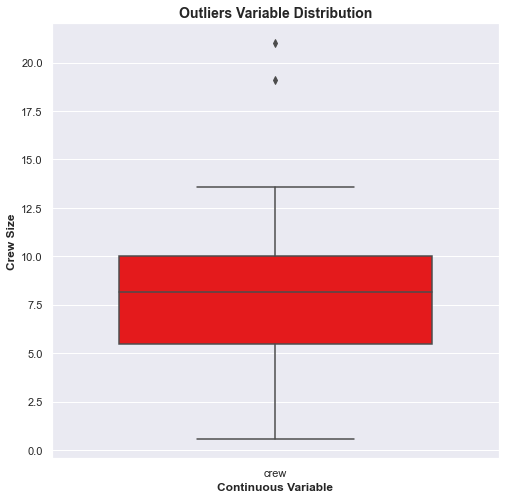

In [7]:
# Outlier Analysis of target variable with maximum amount of Inconsistency
outliers = ['crew']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=ship[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Crew Size", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
ship.shape

Insights: There are some crew sizes above 13.5 which can be termed as outliers which will be addressed using standarization scaling.

In [8]:
# Extracting Ship Company from the Ship_name 
ship['Ship_name'] = ship['Ship_name'].str.split(' ',expand=True)

# Unique Ship company
ship['Ship_name'].unique()

array(['Journey', 'Quest', 'Celebration', 'Conquest', 'Destiny',
       'Ecstasy', 'Elation', 'Fantasy', 'Fascination', 'Freedom', 'Glory',
       'Holiday', 'Imagination', 'Inspiration', 'Legend', 'Liberty*',
       'Miracle', 'Paradise', 'Pride', 'Sensation', 'Spirit', 'Triumph',
       'Valor', 'Victory', 'Century', 'Constellation', 'Galaxy',
       'Infinity', 'Mercury', 'Millenium', 'Solstice', 'Summit',
       'Xpedition', 'Zenith', 'Allegra', 'Atlantica', 'Classica',
       'Europa', 'Fortuna', 'Magica', 'Marina', 'Mediterranea',
       'Romantica', 'Serena', 'Victoria', 'Serenity', 'Symphony',
       'QueenElizabethII', 'QueenMary2', 'QueenVictoria', 'Magic',
       'Wonder', 'Amsterdam', 'Eurodam', 'Maasdam', 'Noordam',
       'Oosterdam', 'Prinsendam', 'Rotterdam', 'Ryndam', 'Statendam',
       'Veendam', 'Volendam', 'Westerdam', 'Zaandam', 'Zuiderdam',
       'Armonia', 'Fantasia', 'Lirica', 'Melody', 'Musica', 'Opera',
       'Rhapsody', 'Sinfonia', 'Crown', 'Dawn', 'Dream'

In [9]:
# Unique Ship company
ship['Ship_name'].value_counts()

Spirit           4
Legend           3
Star             3
Mariner          2
Jewel            2
                ..
Nautica          1
QueenVictoria    1
Prinsendam       1
Zaandam          1
Allegra          1
Name: Ship_name, Length: 138, dtype: int64

We have 138 unique ship names.

### Visualizations

In [10]:
# Segregation of Numerical and Categorical Variables/Columns
obj_col = ship.select_dtypes(include=['object']).columns
num_col = ship.select_dtypes(exclude=['object']).columns
ship_obj = ship[obj_col]
ship_num = ship[num_col]

Text(0, 0.5, 'Count of Ships')

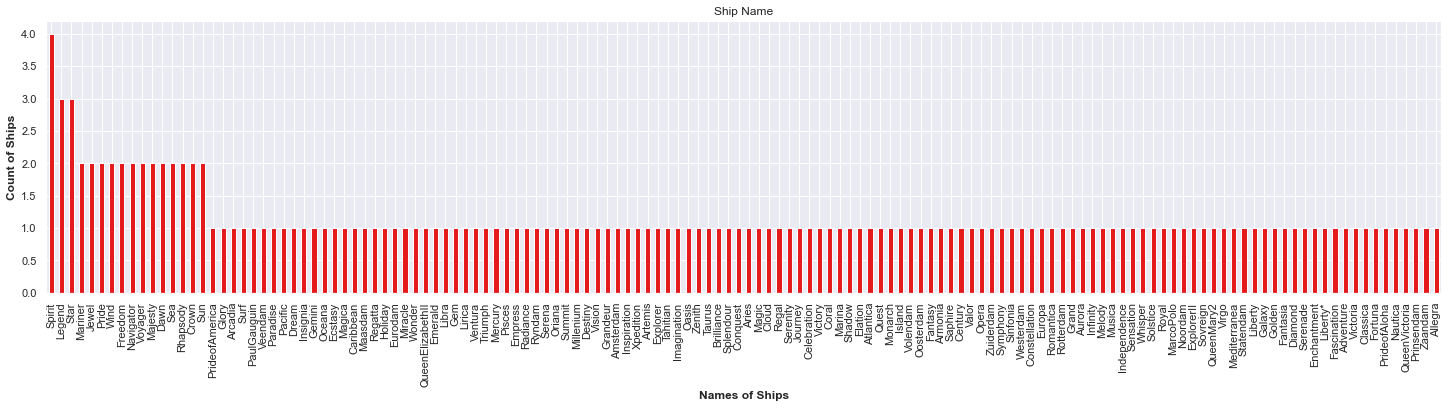

In [11]:
# Visualizing the different ship names available
plt.rcParams['figure.figsize'] = [25,5]
ax=ship['Ship_name'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('Ship Name')
plt.xlabel("Names of Ships",fontweight = 'bold')
plt.ylabel("Count of Ships",fontweight = 'bold')

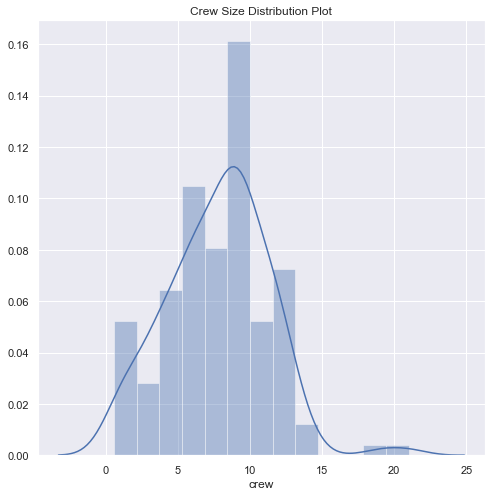

In [12]:
#Crew distribution plot
plt.figure(figsize=(8,8))
plt.title('Crew Size Distribution Plot')
sns.distplot(ship['crew'])

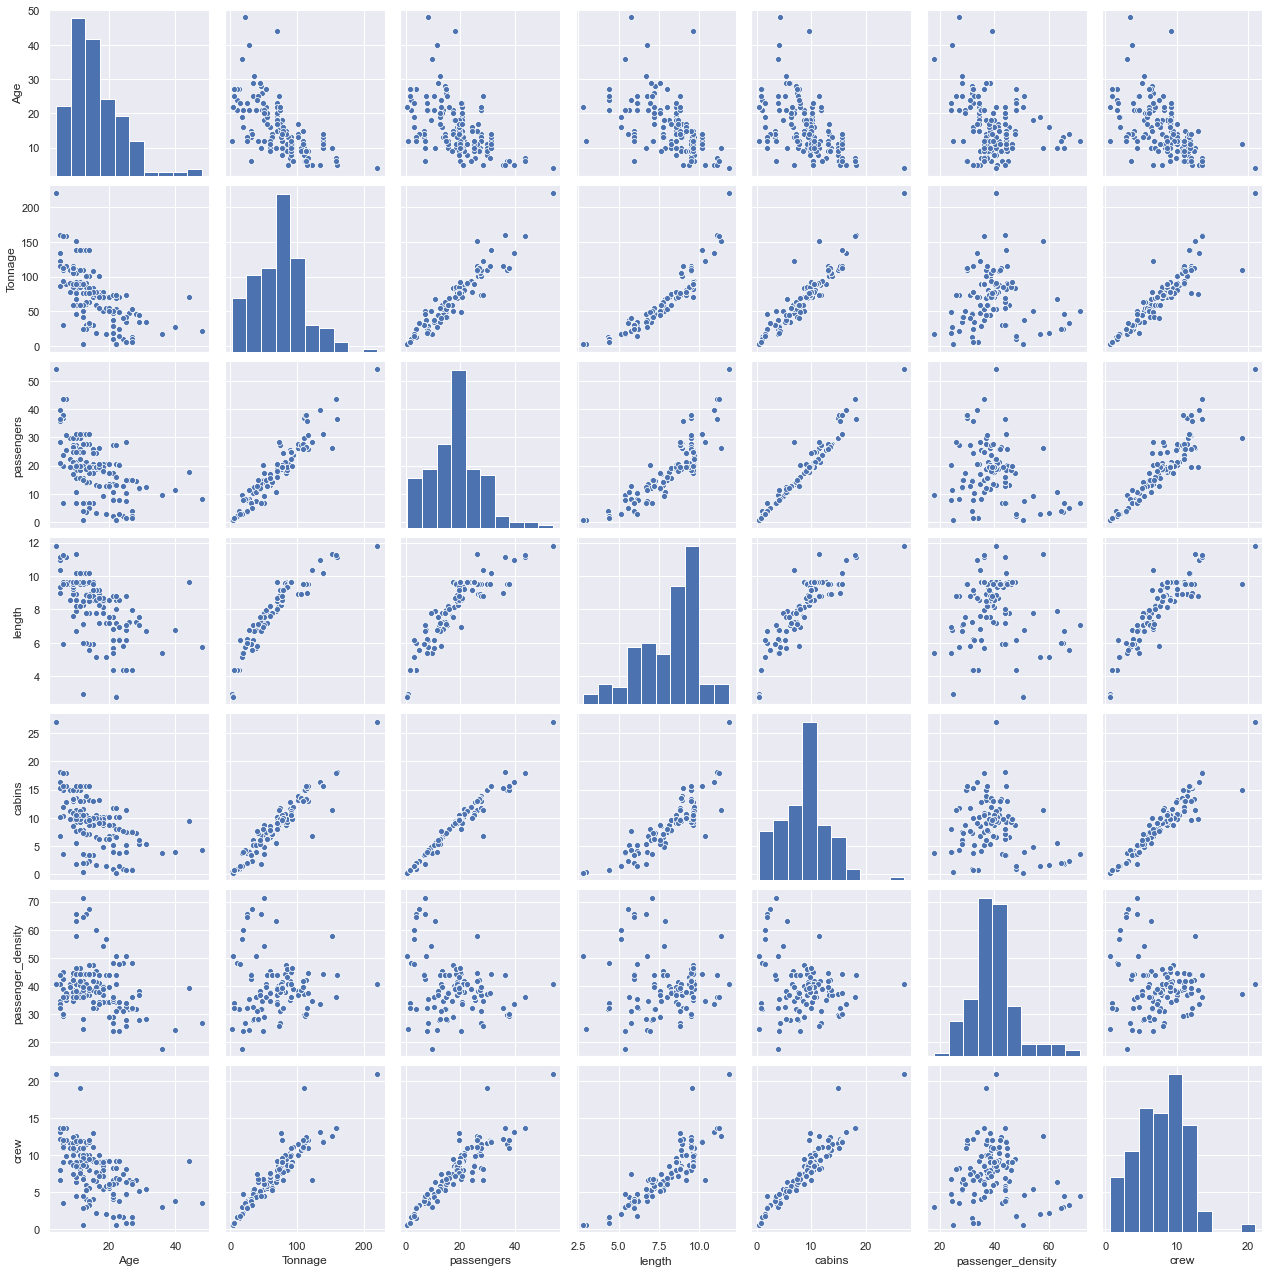

In [13]:
ax = sns.pairplot(ship[num_col])

From the pairplot we observe that the Tonnage, Cabins, Length and Passengers values show positive correlations with the dependent variable "crew".

In [14]:
sig_col = ['crew','cabins', 'passengers', 'Tonnage', 'length']
ship_sig = ship[sig_col]
ship_sig.head()

,crew,cabins,passengers,Tonnage,length
0,3.5500,3.5500,6.9400,30.2770,5.9400
1,3.5500,3.5500,6.9400,30.2770,5.9400
2,6.7000,7.4300,14.8600,47.2620,7.2200
3,19.1000,14.8800,29.7400,110.0000,9.5300
4,10.0000,13.2100,26.4200,101.3530,8.9200


## Build a machine learning model to predict the crew size

### Preprocessing 
From observation we can see that the dataset has some non-numeric values ie. the object columns ('Ship_name', 'Cruise_line'), these non-numeric columns needs to be handled. First, we will be converting all the non-numeric values into numeric ones. This is done by using the dummy encoding method.

In [15]:
ship_cat = ['Ship_name', 'Cruise_line']
dummies = pd.get_dummies(ship[ship_cat], drop_first=True)
dummies.shape

(158, 156)

In [16]:
dummies.head(3)

,Ship_name_Allegra,Ship_name_Amsterdam,Ship_name_Arcadia,Ship_name_Aries,Ship_name_Armonia,Ship_name_Artemis,Ship_name_Atlantica,Ship_name_Aurora,Ship_name_Brilliance,Ship_name_Caribbean,Ship_name_Celebration,Ship_name_Century,Ship_name_Classica,Ship_name_Cloud,Ship_name_Conquest,Ship_name_Constellation,Ship_name_Coral,Ship_name_Crown,Ship_name_Dawn,Ship_name_Destiny,Ship_name_Diamond,Ship_name_Dream,Ship_name_Ecstasy,Ship_name_Elation,Ship_name_Emerald,Ship_name_Empress,Ship_name_Enchantment,Ship_name_Eurodam,Ship_name_Europa,Ship_name_Explorer,Ship_name_ExplorerII,Ship_name_Fantasia,Ship_name_Fantasy,Ship_name_Fascination,Ship_name_Fortuna,Ship_name_Freedom,Ship_name_Galaxy,Ship_name_Gem,Ship_name_Gemini,Ship_name_Glory,Ship_name_Golden,Ship_name_Grand,Ship_name_Grandeur,Ship_name_Holiday,Ship_name_Imagination,Ship_name_Independence,Ship_name_Infinity,Ship_name_Insignia,Ship_name_Inspiration,Ship_name_Island,Ship_name_Jewel,Ship_name_Journey,Ship_name_Legend,Ship_name_Liberty,Ship_name_Liberty*,Ship_name_Libra,Ship_name_Lirica,Ship_name_Maasdam,Ship_name_Magic,Ship_name_Magica,Ship_name_Majesty,Ship_name_MarcoPolo,Ship_name_Marina,Ship_name_Mariner,Ship_name_Mediterranea,Ship_name_Melody,Ship_name_Mercury,Ship_name_Millenium,Ship_name_Miracle,Ship_name_Monarch,Ship_name_Musica,Ship_name_Nautica,Ship_name_Navigator,Ship_name_Noordam,Ship_name_Oasis,Ship_name_Oceana,Ship_name_Oosterdam,Ship_name_Opera,Ship_name_Oriana,Ship_name_Pacific,Ship_name_Paradise,Ship_name_PaulGauguin,Ship_name_Pisces,Ship_name_Pride,Ship_name_PrideofAloha,Ship_name_PrideofAmerica,Ship_name_Prinsendam,Ship_name_QueenElizabethII,Ship_name_QueenMary2,Ship_name_QueenVictoria,Ship_name_Quest,Ship_name_Radiance,Ship_name_Regal,Ship_name_Regatta,Ship_name_Rhapsody,Ship_name_Romantica,Ship_name_Rotterdam,Ship_name_Royal,Ship_name_Ryndam,Ship_name_Saphire,Ship_name_Sea,Ship_name_Sensation,Ship_name_Serena,Ship_name_Serenade,Ship_name_Serenity,Ship_name_Shadow,Ship_name_Sinfonia,Ship_name_Solstice,Ship_name_Sovreign,Ship_name_Spirit,Ship_name_Splendour,Ship_name_Star,Ship_name_Statendam,Ship_name_Summit,Ship_name_Sun,Ship_name_Surf,Ship_name_Symphony,Ship_name_Tahitian,Ship_name_Taurus,Ship_name_Triumph,Ship_name_Valor,Ship_name_Veendam,Ship_name_Ventura,Ship_name_Victoria,Ship_name_Victory,Ship_name_Virgo,Ship_name_Vision,Ship_name_Volendam,Ship_name_Voyager,Ship_name_Westerdam,Ship_name_Whisper,Ship_name_Wind,Ship_name_Wonder,Ship_name_Xpedition,Ship_name_Zaandam,Ship_name_Zenith,Ship_name_Zuiderdam,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,Cruise_line_Crystal,Cruise_line_Cunard,Cruise_line_Disney,Cruise_line_Holland_American,Cruise_line_MSC,Cruise_line_Norwegian,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
#Re-indexing the column names
ship = ship.reindex(columns = ['crew', 'length', 'Tonnage', 'cabins', 'passengers', 'passenger_density', 'Age', 'Ship_name', 'Cruise_line'])
ship.head()

,crew,length,Tonnage,cabins,passengers,passenger_density,Age,Ship_name,Cruise_line
0,3.5500,5.9400,30.2770,3.5500,6.9400,42.6400,6,Journey,Azamara
1,3.5500,5.9400,30.2770,3.5500,6.9400,42.6400,6,Quest,Azamara
2,6.7000,7.2200,47.2620,7.4300,14.8600,31.8000,26,Celebration,Carnival
3,19.1000,9.5300,110.0000,14.8800,29.7400,36.9900,11,Conquest,Carnival
4,10.0000,8.9200,101.3530,13.2100,26.4200,38.3600,17,Destiny,Carnival


### Standardization

In [18]:
scaler = preprocessing.StandardScaler()
ship_sig_col = ['crew', 'Tonnage', 'cabins', 'passengers', 'length', 'Age', 'passenger_density']
import warnings
warnings.filterwarnings("ignore")
ship[ship_sig_col] = scaler.fit_transform(ship[ship_sig_col])
ship.head()

,crew,length,Tonnage,cabins,passengers,passenger_density,Age,Ship_name,Cruise_line
0,-1.2153,-1.2253,-1.1050,-1.1846,-1.1940,0.3181,-1.2764,Journey,Azamara
1,-1.2153,-1.2253,-1.1050,-1.1846,-1.1940,0.3181,-1.2764,Quest,Azamara
2,-0.3133,-0.5094,-0.6473,-0.3141,-0.3729,-0.9407,1.3581,Celebration,Carnival
3,3.2373,0.7827,1.0432,1.3573,1.1696,-0.3380,-0.6178,Conquest,Carnival
4,0.6316,0.4415,0.8102,0.9827,0.8254,-0.1789,0.1726,Destiny,Carnival


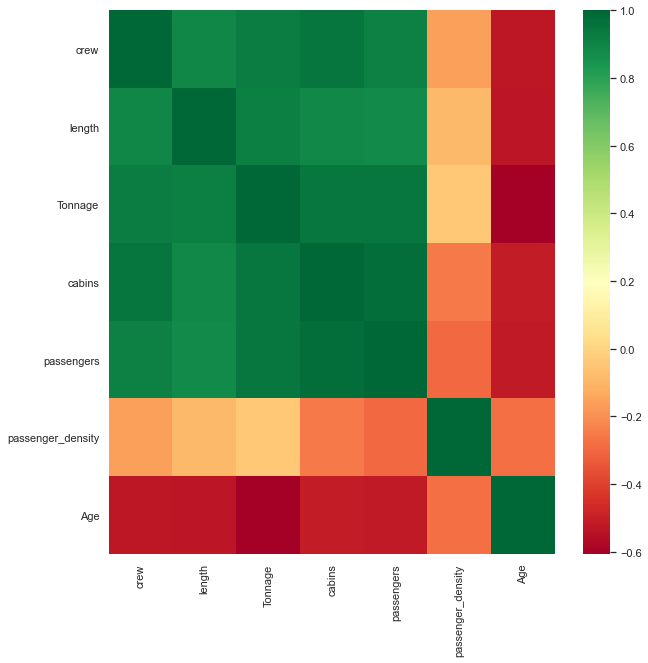

In [19]:
plt.figure(figsize = (10, 10))
sns.heatmap(ship.corr(), cmap="RdYlGn")
plt.show()

In [20]:
ship.corr()

,crew,length,Tonnage,cabins,passengers,passenger_density,Age
crew,1.0000,0.8959,0.9276,0.9508,0.9152,-0.1555,-0.5307
length,0.8959,1.0000,0.9224,0.8898,0.8835,-0.0905,-0.5323
Tonnage,0.9276,0.9224,1.0000,0.9488,0.9451,-0.0408,-0.6066
cabins,0.9508,0.8898,0.9488,1.0000,0.9763,-0.2532,-0.5100
passengers,0.9152,0.8835,0.9451,0.9763,1.0000,-0.2949,-0.5155
passenger_density,-0.1555,-0.0905,-0.0408,-0.2532,-0.2949,1.0000,-0.2788
Age,-0.5307,-0.5323,-0.6066,-0.5100,-0.5155,-0.2788,1.0000


From the heatmap we observe four variables show significant positive correlation with the dependent variable. We will thus work with these variables; Tonnage, Cabins, Passengers and Length.

### Regression Line PLot Positively Correlated Variables

R squared (crew & Tonnage): 0.8603839001508913


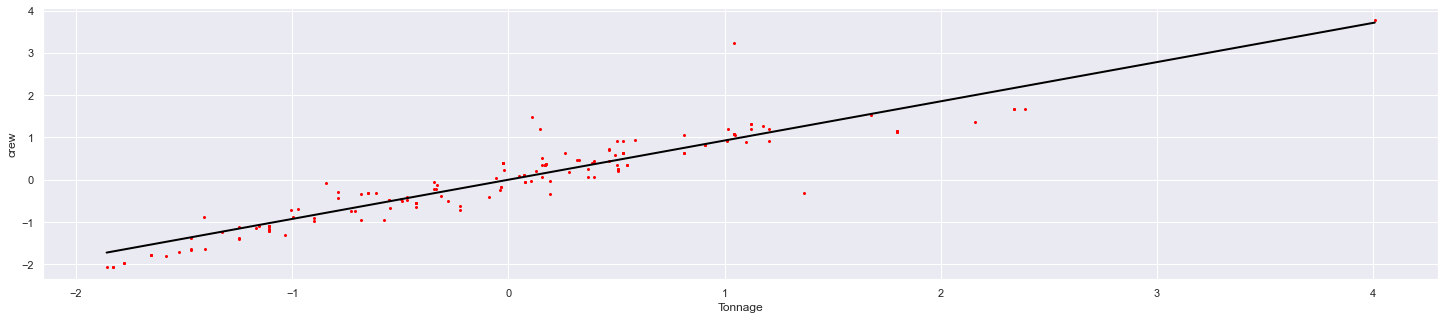

In [21]:
# Create arrays for features and target variable
X_T = ship['Tonnage'].values
y = ship["crew"].values

# Reshape X and y
y = y.reshape(-1,1)
X_T = X_T.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_T), max(X_T)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_T, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R squared (crew & Tonnage):",reg.score(X_T, y))

# Plot regression line
ship.plot(kind="scatter", x ='Tonnage', y='crew',s = 4, color='red')
plt.plot(prediction_space, y_pred, linewidth=2, color='black')
plt.show()

R squared (crew & cabins): 0.9040636287611352


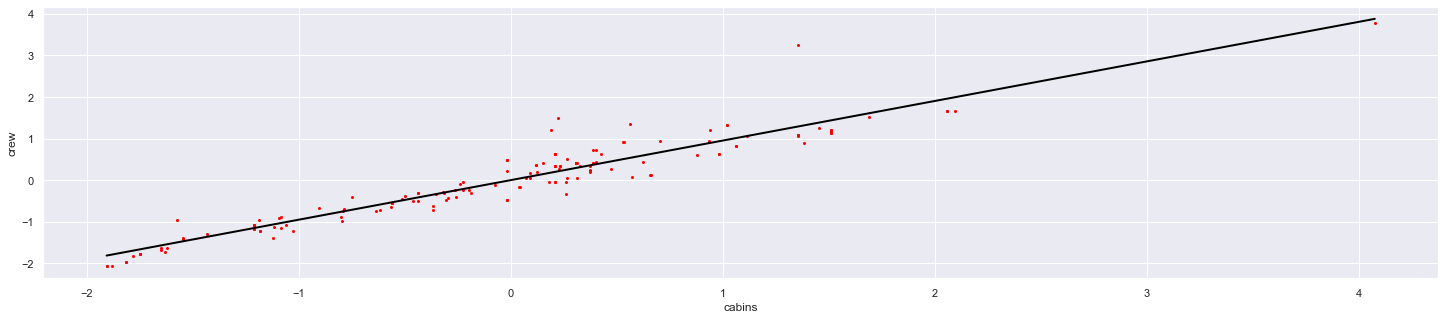

In [22]:
# Create arrays for features and target variable
X_c = ship['cabins'].values
y = ship["crew"].values

# Reshape X and y
y = y.reshape(-1,1)
X_c = X_c.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_c), max(X_c)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_c, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R squared (crew & cabins):",reg.score(X_c, y))

# Plot regression line
ship.plot(kind="scatter", x ='cabins', y='crew',s = 4, color='red')
plt.plot(prediction_space, y_pred, linewidth=2, color='black')
plt.show()

R squared (crew & passengers): 0.8376535138271071


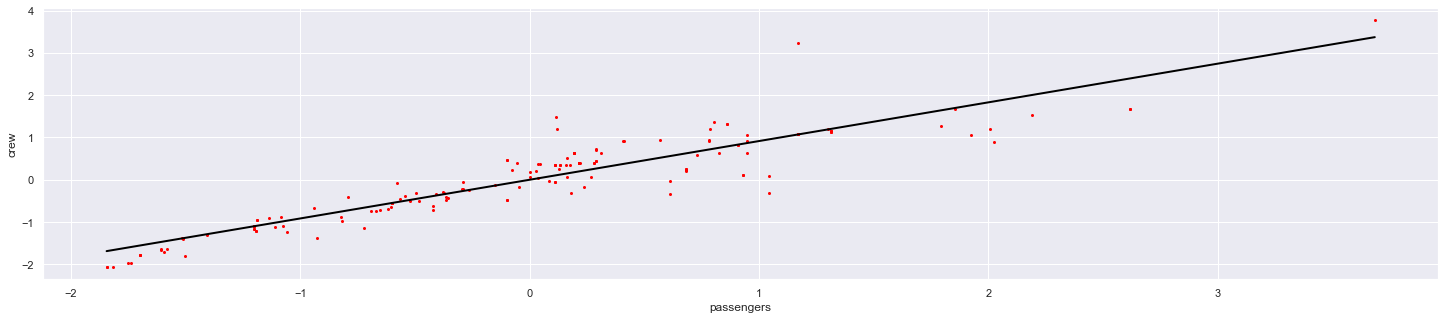

In [23]:
# Create arrays for features and target variable
X_p = ship['passengers'].values
y = ship["crew"].values

# Reshape X and y
y = y.reshape(-1,1)
X_p = X_p.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_p), max(X_p)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_p, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R squared (crew & passengers):",reg.score(X_p, y))

# Plot regression line
ship.plot(kind="scatter", x ='passengers', y='crew',s = 4, color='red')
plt.plot(prediction_space, y_pred, linewidth=2, color='black')
plt.show()

R squared (crew & length): 0.8025590963219591


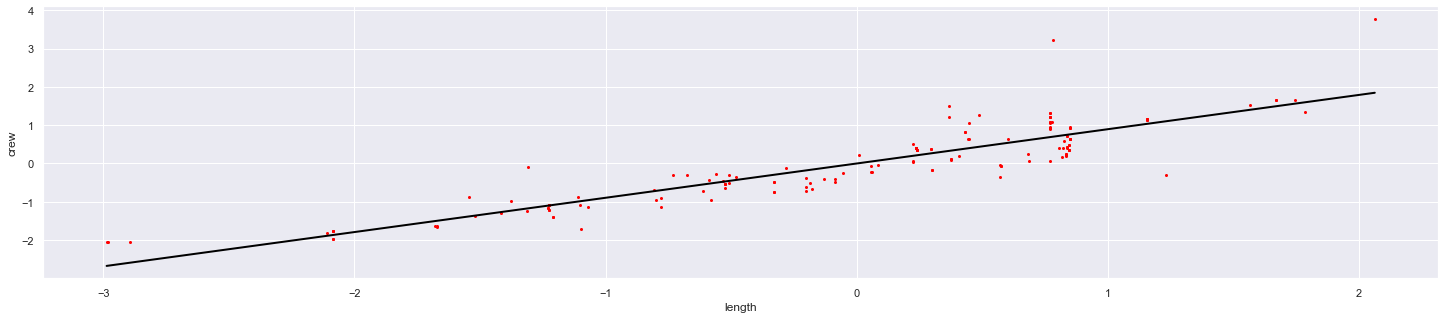

In [24]:
# Create arrays for features and target variable
X_l = ship['length'].values
y = ship["crew"].values

# Reshape X and y
y = y.reshape(-1,1)
X_l = X_l.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_l), max(X_l)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_l, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R squared (crew & length):",reg.score(X_l, y))

# Plot regression line
ship.plot(kind="scatter", x ='length', y='crew',s = 4, color='red')
plt.plot(prediction_space, y_pred, linewidth=2, color='black')
plt.show()

### Splitting the data set into train and test sets

In [25]:
# Create arrays for features and target variable
X = ship[['Tonnage','passengers','length','cabins']].values
y = ship["crew"].values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

X_train.shape, y_train.shape
X_test.shape, y_test.shape

((64, 4), (64,))

In [26]:
# Create the regressor: reg_all
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg.score(X_test, y_test)))
print("(R^2): %.2f" %r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.936439776365783
(R^2): 0.94
Root Mean Squared Error: 0.25659535417787954


We can see that the value of root mean squared error is 0.257, which is less than 10% of the mean value of the crew. This means that our algorithm is accurate and can make reasonably good predictions

In [27]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('intercept: ', reg.intercept_)

Mean Absolute Error: 0.19877581105119965
Mean Squared Error: 0.06584117578567145
Root Mean Squared Error: 0.25659535417787954
intercept:  0.017310836345084957


### Calculating the Pearson correlation coefficient for the training set and testing data sets.

Pearson's correlation coefficient (r) is a measure of the strength of the association between the two variables.


In [28]:
print('coefficient: ', reg.coef_)

coefficient:  [ 0.21705726 -0.52989219  0.15970228  1.14831303]


### Dataframe showing the Standardized Actual Test and Predicted Test

In [29]:
#Creating a dataframe for standardized actual test and the predicted test
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,-0.1701,0.1269
1,-0.4107,-0.4598
2,3.7813,3.9454
3,-1.9798,-1.8636
4,-1.2296,-1.1002
...,...,...
59,-0.5481,-0.4849
60,-0.2847,-0.4109
61,-0.2274,-0.1511
62,0.7175,0.5602
